In [7]:
import pandas as pd

# Load all the sub-borough CSVs
income_df = pd.read_csv("sub-borougharea-incomediversityratio.csv")
racial_df = pd.read_csv("sub-borougharea-racialdiversityindex.csv")
education_df = pd.read_csv("sub-borougharea-populationaged25withabachelorsdegreeorhigher.csv")
carfree_df = pd.read_csv("sub-borougharea-car-freecommuteofcommuters.csv")
travel_df = pd.read_csv("sub-borougharea-meantraveltimetoworkminutes.csv")
poverty_df = pd.read_csv("sub-borougharea-povertyrate.csv")
nohs_df = pd.read_csv("sub-borougharea-populationaged25withoutahighschooldiploma.csv")
crowding_df = pd.read_csv("sub-borougharea-populationaged65.csv")
affordable_df = pd.read_csv("sub-borougharea-rentalunitsaffordableat80amiofrecentlyavailableunits.csv")
above65_df = pd.read_csv("sub-borougharea-populationaged65.csv")
under18_df = pd.read_csv("sub-borougharea-householdswithchildrenunder18yearsold.csv")
homeownership_df = pd.read_csv("sub-borougharea-homeownershiprate.csv")
born_df = pd.read_csv("sub-borougharea-borninnewyorkstate.csv")
new_df = pd.read_csv("communitydistrict-unitsauthorizedbynewresidentialbuildingpermits.csv")
foreclosure_df = pd.read_csv("sub-borougharea-noticesofforeclosureallresidentialproperties.csv")
median_income_df = pd.read_csv("sub-borougharea-medianhouseholdincome2023.csv")

# Helper function to keep and rename year columns
def select_and_prefix(df, prefix):
    year_cols = [col for col in df.columns if col.startswith("20")]
    renamed = {col: f"{prefix}_{col}" for col in year_cols}
    return df[["Sub-Borough Area"] + year_cols].rename(columns=renamed)

# Apply prefixing to avoid column collisions
income_df = select_and_prefix(income_df, "income")
racial_df = select_and_prefix(racial_df, "racial")
education_df = select_and_prefix(education_df, "education")
carfree_df = select_and_prefix(carfree_df, "carfree")
travel_df = select_and_prefix(travel_df, "travel")
poverty_df = select_and_prefix(poverty_df, "poverty")
nohs_df = select_and_prefix(nohs_df, "nohs")
crowding_df = select_and_prefix(crowding_df, "crowding")
affordable_df = select_and_prefix(affordable_df, "affordable")
above65_df = select_and_prefix(above65_df, "above65")
under18_df = select_and_prefix(under18_df, "under18")
homeownership_df = select_and_prefix(homeownership_df, "homeownership")
born_df = select_and_prefix(born_df, "born")
# Note: `new_df` may not have Sub-Borough Area; skipping unless mapped
foreclosure_df = select_and_prefix(foreclosure_df, "foreclosure")
median_income_df = select_and_prefix(median_income_df, "income_median")

# Merge all datasets on Sub-Borough Area
merged_df = income_df.merge(racial_df, on="Sub-Borough Area") \
                     .merge(education_df, on="Sub-Borough Area") \
                     .merge(carfree_df, on="Sub-Borough Area") \
                     .merge(travel_df, on="Sub-Borough Area") \
                     .merge(poverty_df, on="Sub-Borough Area") \
                     .merge(nohs_df, on="Sub-Borough Area") \
                     .merge(crowding_df, on="Sub-Borough Area") \
                     .merge(affordable_df, on="Sub-Borough Area") \
                     .merge(above65_df, on="Sub-Borough Area") \
                     .merge(under18_df, on="Sub-Borough Area") \
                     .merge(homeownership_df, on="Sub-Borough Area") \
                     .merge(born_df, on="Sub-Borough Area") \
                     .merge(foreclosure_df, on="Sub-Borough Area") \
                     .merge(median_income_df, on="Sub-Borough Area")

# Final merged DataFrame
df1 = merged_df

# Save to CSV (optional)
df1.to_csv("all_years_gentrification_dataset.csv", index=False)

# Quick preview
print("Merged dataset shape:", df1.shape)
print(df1.head())


Merged dataset shape: (55, 282)
                       Sub-Borough Area  income_2005  income_2006  \
0                       Upper East Side     6.081081     5.514706   
1  Morningside Heights/Hamilton Heights     8.820000     8.255814   
2                        Central Harlem     7.900000     7.500000   
3                           East Harlem     5.931818     6.511765   
4             Washington Heights/Inwood     5.412490     5.451613   

   income_2007  income_2008  income_2009  income_2010  income_2011  \
0     5.395745     5.144033     5.909091     5.955335     5.938776   
1     7.806897     7.132353     6.962025     9.333333     7.158730   
2     6.181818     7.442308     7.870370     7.456140     5.600000   
3     6.327273     6.441441     6.818182     6.250000     6.800000   
4     4.827586     5.131579     6.302158     4.666667     4.993711   

   income_2012  income_2013  ...  income_median_2013  income_median_2014  \
0     5.000000     6.750000  ...       135013.664989    

In [8]:

# MAP CD TO SBA

# Load the community district CSVs
ela_df = pd.read_csv("communitydistrict-studentsperformingatgradelevelinenglishlanguagearts4thgrade.csv")
math_df = pd.read_csv("communitydistrict-studentsperformingatgradelevelinmath4thgrade.csv")
parks_df = pd.read_csv("communitydistrict-residentialunitswithin14mileofapark.csv")
subway_df = pd.read_csv("communitydistrict-residentialunitswithin12mileofasubwaystation.csv")

# Select the columns we need and give them friendlier names
ela_df = ela_df[["Community District", "2017", "2019"]].rename(columns={
    "2017": "ela_grade4_2017", "2019": "ela_grade4_2019"
})
math_df = math_df[["Community District", "2017", "2019"]].rename(columns={
    "2017": "math_grade4_2017", "2019": "math_grade4_2019"
})
parks_df = parks_df[["Community District", "2017"]].rename(columns={
    "2017": "park_access_2017"
})
subway_df = subway_df[["Community District", "2017"]].rename(columns={
    "2017": "subway_access_2017"
})

# Merge these community district files together by "Community District"
cd_df = ela_df.merge(math_df, on="Community District") \
              .merge(parks_df, on="Community District") \
              .merge(subway_df, on="Community District")

cd_df
df2 = cd_df
df2

,Community District,ela_grade4_2017,ela_grade4_2019,math_grade4_2017,math_grade4_2019,park_access_2017,subway_access_2017
0,MN 01 - Financial District,0.783784,0.857143,0.815718,0.846966,0.986067,1.000000
1,MN 02 - Greenwich Village/Soho,0.790323,0.803077,0.832000,0.857576,0.995910,1.000000
2,MN 03 - Lower East Side/Chinatown,0.568421,0.642405,0.592083,0.624738,0.997909,0.855089
3,MN 04 - Clinton/Chelsea,0.667482,0.665848,0.641463,0.599515,0.789133,0.943890
4,MN 05 - Midtown,0.829268,0.833333,0.682927,0.802817,0.635637,1.000000
5,MN 06 - Stuyvesant Town/Turtle Bay,0.798587,0.835088,0.748276,0.788927,0.908681,0.949928
6,MN 07 - Upper West Side,0.719536,0.787524,0.734615,0.756707,0.993337,0.990849
7,MN 08 - Upper East Side,0.808184,0.868493,0.779747,0.836927,0.686200,0.964513
8,MN 09 - Morningside Heights/Hamilton,0.378319,0.401425,0.342795,0.394919,0.999648,1.000000
9,MN 10 - Central Harlem,0.231810,0.286458,0.144279,0.227740,0.966882,1.000000


In [9]:
mapping = {
    # Manhattan (MN)
    'Upper East Side': 'MN 08',
    'Morningside Heights/Hamilton Heights': 'MN 09',
    'Central Harlem': 'MN 10',
    'East Harlem': 'MN 11',
    'Washington Heights/Inwood': 'MN 12',
    'Chelsea/Clinton/Midtown': 'MN 04',  # MN 04 (Clinton/Chelsea) is primary; MN 05 (Midtown) partial overlap
    'Stuyvesant Town/Turtle Bay': 'MN 06',
    'Upper West Side': 'MN 07',
    'Greenwich Village/Financial District': 'MN 01',  # MN 01 (Financial District) primary; MN 02 (Greenwich Village/Soho) partial
    'Lower East Side/Chinatown': 'MN 03',

    # Bronx (BX)
    'Mott Haven/Hunts Point': 'BX 01',  # BX 01 (Mott Haven/Melrose); BX 02 (Hunts Point/Longwood) also applies
    'Morrisania/Belmont': 'BX 03',      # BX 03 (Morrisania/Crotona); BX 06 (Belmont/East Tremont) also applies
    'Highbridge/South Concourse': 'BX 04',
    'University Heights/Fordham': 'BX 05',  # BX 05 (Fordham/University Heights); BX 07 partial overlap
    'Kingsbridge Heights/Mosholu': 'BX 07',
    'Riverdale/Kingsbridge': 'BX 08',
    'Soundview/Parkchester': 'BX 09',
    'Throgs Neck/Co-op City': 'BX 10',
    'Pelham Parkway': 'BX 11',
    'Williamsbridge/Baychester': 'BX 12',

    # Brooklyn (BK)
    'Williamsburg/Greenpoint': 'BK 01',
    'Brooklyn Heights/Fort Greene': 'BK 02',
    'Bedford Stuyvesant': 'BK 03',
    'Bushwick': 'BK 04',
    'East New York/Starrett City': 'BK 05',
    'Park Slope/Carroll Gardens': 'BK 06',
    'Sunset Park': 'BK 07',
    'North Crown Heights/Prospect Heights': 'BK 08',
    'South Crown Heights': 'BK 09',
    'Bay Ridge': 'BK 10',
    'Bensonhurst': 'BK 11',
    'Borough Park': 'BK 12',
    'Coney Island': 'BK 13',
    'Flatbush': 'BK 14',
    'Sheepshead Bay/Gravesend': 'BK 15',
    'Brownsville/Ocean Hill': 'BK 16',
    'East Flatbush': 'BK 17',
    'Flatlands/Canarsie': 'BK 18',

    # Queens (QN)
    'Astoria': 'QN 01',
    'Sunnyside/Woodside': 'QN 02',
    'Jackson Heights': 'QN 03',
    'Elmhurst/Corona': 'QN 04',
    'Middle Village/Ridgewood': 'QN 05',
    'Rego Park/Forest Hills': 'QN 06',
    'Flushing/Whitestone': 'QN 07',
    'Hillcrest/Fresh Meadows': 'QN 08',
    'Ozone Park/Woodhaven': 'QN 09',
    'South Ozone Park/Howard Beach': 'QN 10',
    'Bayside/Little Neck': 'QN 11',
    'Jamaica': 'QN 12',
    'Queens Village': 'QN 13',
    'Rockaways': 'QN 14',

    # Staten Island (SI)
    'North Shore': 'SI 01',
    'Mid-Island': 'SI 02',
    'South Shore': 'SI 03'
}

In [10]:
df1['CD_code'] = df1['Sub-Borough Area'].map(mapping)

# Extract 'CD_code' from 'Community District' in df2
df2['CD_code'] = df2['Community District'].str.extract(r'(MN \d+|BX \d+|BK \d+|QN \d+|SI \d+)')

# Merge the dataframes
merged_df = pd.merge(df1, df2, on='CD_code', how='inner')

# Drop the temporary 'CD_code' column
merged_df = merged_df.drop(columns=['CD_code'])

merged_df

,Sub-Borough Area,income_2005,income_2006,income_2007,income_2008,income_2009,income_2010,income_2011,income_2012,income_2013,...,income_median_2020,income_median_2021,income_median_2022,Community District,ela_grade4_2017,ela_grade4_2019,math_grade4_2017,math_grade4_2019,park_access_2017,subway_access_2017
0,Upper East Side,6.081081,5.514706,5.395745,5.144033,5.909091,5.955335,5.938776,5.000000,6.750000,...,NaN,143787.210347,148515.829594,MN 08 - Upper East Side,0.808184,0.868493,0.779747,0.836927,0.686200,0.964513
1,Morningside Heights/Hamilton Heights,8.820000,8.255814,7.806897,7.132353,6.962025,9.333333,7.158730,9.750000,7.600667,...,NaN,59036.399955,61745.673923,MN 09 - Morningside Heights/Hamilton,0.378319,0.401425,0.342795,0.394919,0.999648,1.000000
2,Central Harlem,7.900000,7.500000,6.181818,7.442308,7.870370,7.456140,5.600000,7.750000,6.885246,...,NaN,49824.906142,51993.570157,MN 10 - Central Harlem,0.231810,0.286458,0.144279,0.227740,0.966882,1.000000
3,East Harlem,5.931818,6.511765,6.327273,6.441441,6.818182,6.250000,6.800000,7.200000,8.100000,...,NaN,45540.823454,36929.876605,MN 11 - East Harlem,0.360179,0.433589,0.339266,0.372144,0.999822,0.975454
4,Washington Heights/Inwood,5.412490,5.451613,4.827586,5.131579,6.302158,4.666667,4.993711,5.442177,6.669231,...,NaN,60275.688467,62187.960328,MN 12 - Washington Heights/Inwood,0.284823,0.425352,0.278337,0.398649,0.984395,1.000000
5,Mott Haven/Hunts Point,6.428571,5.641975,6.470588,4.793103,4.653846,5.340000,4.945055,4.978022,4.770642,...,NaN,33236.065514,32861.049323,BX 01 - Mott Haven/Melrose,0.246418,0.361969,0.219012,0.295497,0.997893,0.999973
6,Morrisania/Belmont,5.423077,4.833333,5.776471,5.458824,5.777778,5.327586,5.106383,4.956044,6.125000,...,NaN,33210.728949,32309.748663,BX 03 - Morrisania/Crotona,0.203070,0.336364,0.184179,0.263687,0.997568,0.630286
7,Highbridge/South Concourse,5.388889,5.689655,5.677419,5.220000,4.658537,5.147059,5.630435,6.093750,4.482759,...,NaN,45865.792441,44605.518374,BX 04 - Highbridge/Concourse,0.258006,0.369405,0.240447,0.364856,0.994302,0.962980
8,University Heights/Fordham,5.922414,5.662651,4.913462,5.400000,6.000000,5.000000,5.096154,5.319588,5.578947,...,NaN,38438.874086,43215.327067,BX 05 - Fordham/University Heights,0.261889,0.337509,0.219975,0.279333,0.993445,0.982789
9,Kingsbridge Heights/Mosholu,5.990291,5.000000,5.042735,5.000000,5.192465,5.327434,5.790441,5.400000,5.472727,...,NaN,41472.652364,33274.265260,BX 07 - Kingsbridge Heights/Bedford,0.290302,0.378072,0.258495,0.348965,0.898369,0.995222


In [11]:



# # Create a normalized "CD Code" (like turning "BK 01" into "BK01")
# cd_df["CD Code"] = cd_df["Community District"].str.extract(r'([A-Z]{2} \d{2})')[0]
# cd_df["CD Code"] = cd_df["CD Code"].str.replace(" ", "")

# # Load our mapping file to link CD Code to Sub-Borough Area
# mapping_df = pd.read_csv("Community_District_to_SBA_Mapping.csv")
# # mapping_df = mapping_df.rename(columns={
# #     "CD Code": "CD Code",
# #     "Sub-Borough Area": "Sub-Borough Area"
# # })

# mapping_df.head()

In [12]:

# # Merge the community district data with the mapping; this gives us an SBA column
# cd_sba_df = cd_df.merge(mapping_df[["CD Code", "SBA"]], on="CD Code", how="left")
# # Rename the "SBA" column to "Sub-Borough Area" so it matches merged_df
# cd_sba_df.rename(columns={"SBA": "Sub-Borough Area"}, inplace=True)



# # final merge

# # Make sure both "Sub-Borough Area" columns are strings to avoid merge type issues
# cd_sba_df["Sub-Borough Area"] = cd_sba_df["Sub-Borough Area"].astype(str)
# merged_df["Sub-Borough Area"] = merged_df["Sub-Borough Area"].astype(str)

# # Merge the community district data (with SBA info) with the sub-borough data
# final_df = cd_sba_df.merge(merged_df, on="Sub-Borough Area", how="left")

# # Quick look at the final merged DataFrame

# final_df.head()

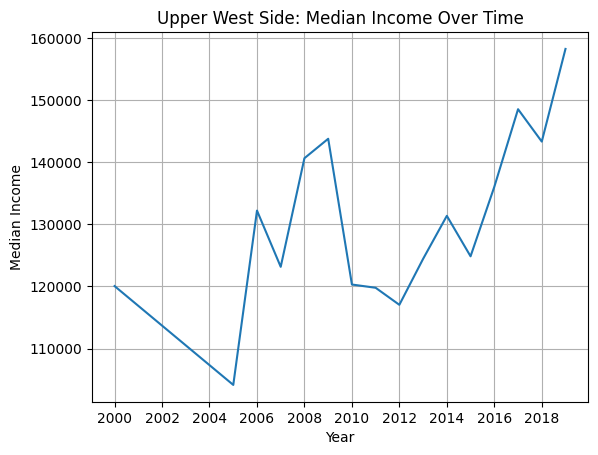

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Just in case
# merged_df = pd.read_csv("all_years_gentrification_dataset.csv")

# Select one sub-borough area and one variable to model (example: Upper West Side & median income)
area = "Upper West Side"
variable_prefix = "income_median_"

# Extract columns for that variable
cols = [col for col in merged_df.columns if col.startswith(variable_prefix)]
subset = merged_df[merged_df["Sub-Borough Area"] == area][cols].T
subset.columns = ["value"]
subset.index = [int(col.split("_")[-1]) for col in cols]
subset = subset[subset.index <= 2019]  # Only keep up to 2019
subset = subset.sort_index()

subset.index = pd.to_datetime(subset.index, format='%Y')

# Visualize
plt.plot(subset.index, subset["value"])
plt.title(f"{area}: Median Income Over Time")
plt.xlabel("Year")
plt.ylabel("Median Income")
plt.grid()
plt.show()


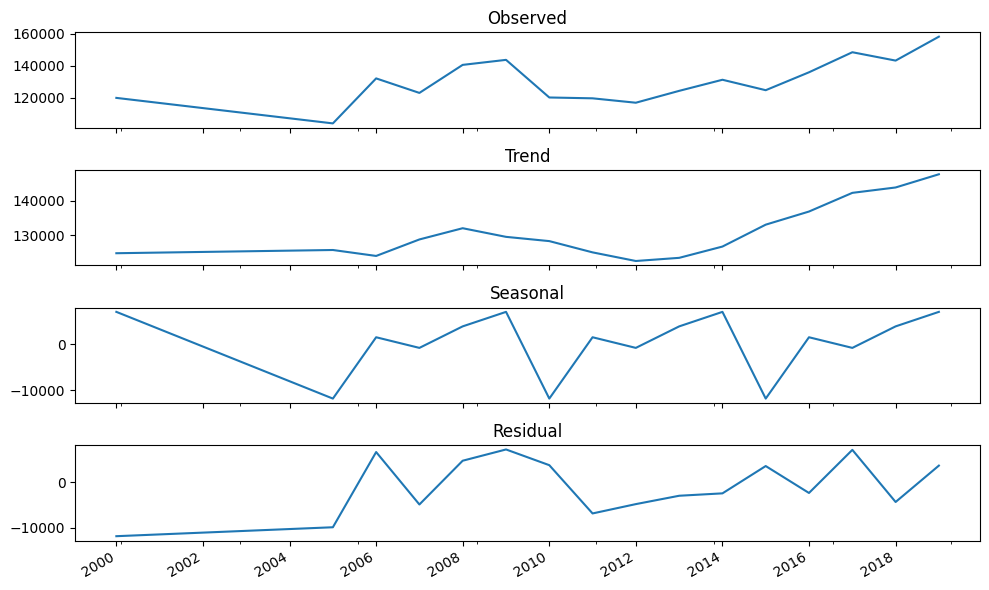

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Drop NA values
ts = subset["value"].dropna()

# Run decomposition (assume 5-year seasonal pattern for now)
decomp = seasonal_decompose(ts, model="additive", period=5, extrapolate_trend="freq")

fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(10, 6), sharex=True)
decomp.observed.plot(ax=ax[0], title="Observed")
decomp.trend.plot(ax=ax[1], title="Trend")
decomp.seasonal.plot(ax=ax[2], title="Seasonal")
decomp.resid.plot(ax=ax[3], title="Residual")
plt.tight_layout()
plt.show()


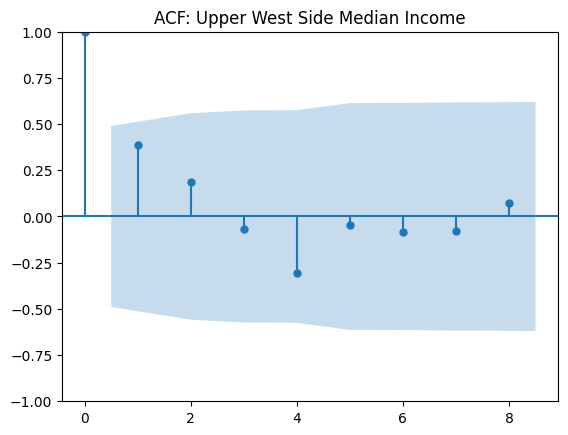

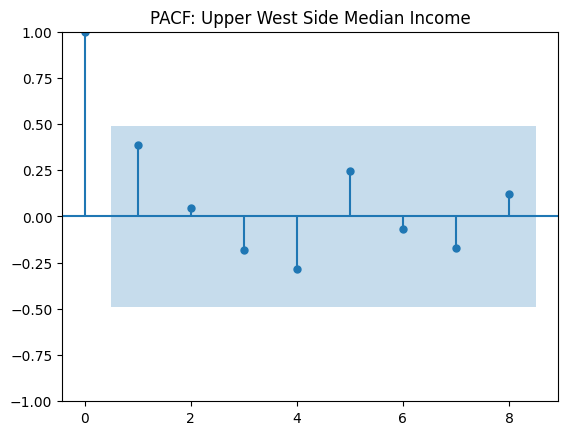

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: 

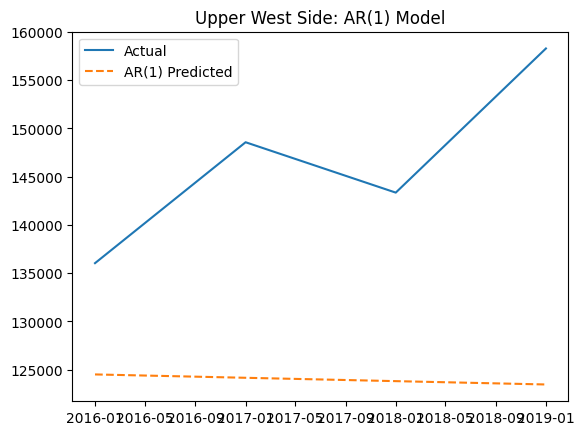

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

plot_acf(ts)
plt.title(f"ACF: {area} Median Income")
plt.show()

plot_pacf(ts)
plt.title(f"PACF: {area} Median Income")
plt.show()

# Fit AR(1) model
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

ar_model = AutoReg(train, lags=1, trend='n')
ar_results = ar_model.fit()

# Predict
pred = ar_results.predict(start=len(train), end=len(train)+len(test)-1)

# Plot
plt.plot(test.index, test.values, label="Actual")
plt.plot(test.index, pred.values, label="AR(1) Predicted", linestyle="--")
plt.legend()
plt.title(f"{area}: AR(1) Model")
plt.show()


# ARMA by hand

In [24]:
area = "Upper West Side"
prefix = "income_median_"
cols = [col for col in merged_df.columns if col.startswith(prefix)]
subset = merged_df[merged_df["Sub-Borough Area"] == area][cols].T
subset.columns = ["y"]
subset.index = [int(col.split("_")[-1]) for col in cols]
subset = subset[(subset.index >= 2005) & (subset.index <= 2019)]
subset.index = pd.to_datetime(subset.index, format='%Y')
subset = subset.dropna()



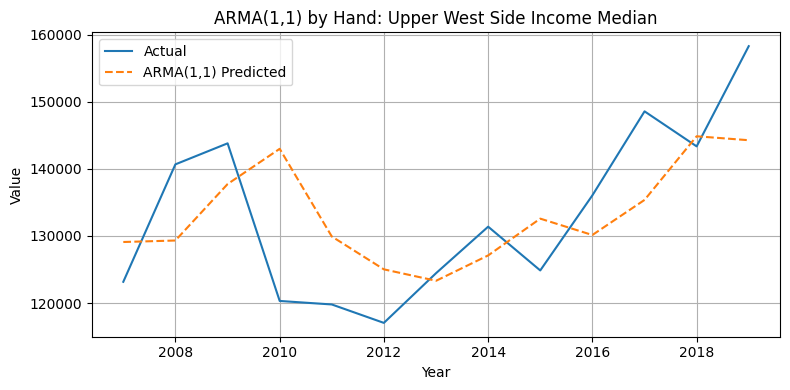

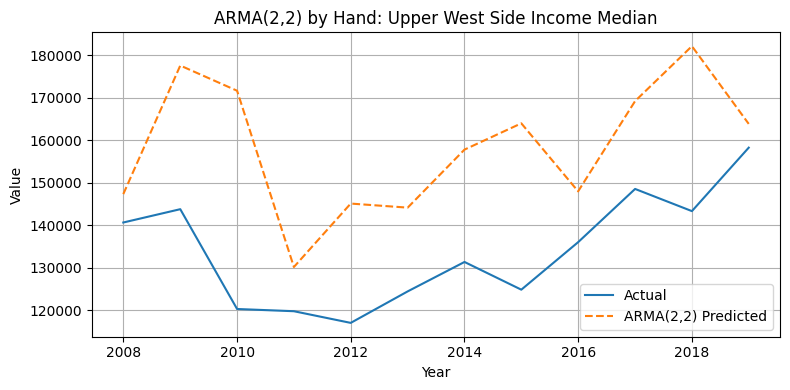

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def fit_arma_hand(df, area, prefix, p=1, q=1, start_year=2005, end_year=2019, plot=True):
    # Prepare time series data
    cols = [col for col in df.columns if col.startswith(prefix)]
    subset = df[df["Sub-Borough Area"] == area][cols].T
    subset.columns = ["y"]
    subset.index = [int(col.split("_")[-1]) for col in cols]
    subset = subset[(subset.index >= start_year) & (subset.index <= end_year)]
    subset.index = pd.to_datetime(subset.index, format="%Y")
    subset = subset.dropna()

    # Create AR lags
    for i in range(1, p + 1):
        subset[f"y_lag{i}"] = subset["y"].shift(i)
        
    # Estimate residuals using naive AR(p)
    subset["naive_pred"] = subset["y"].shift(1)
    subset["resid"] = subset["y"] - subset["naive_pred"]

    # Create MA lags from residuals
    for i in range(1, q + 1):
        subset[f"resid_lag{i}"] = subset["resid"].shift(i)

    subset = subset.dropna()

    # Design matrix
    features = [f"y_lag{i}" for i in range(1, p + 1)] + [f"resid_lag{i}" for i in range(1, q + 1)]
    X = subset[features].values
    y = subset["y"].values.reshape(-1, 1)
    X_design = np.hstack([X, np.ones((X.shape[0], 1))])  # Add intercept

    # OLS solution
    w = np.linalg.inv(X_design.T @ X_design) @ (X_design.T @ y)
    weights = dict(zip(features + ["intercept"], w.flatten()))

    # Predict
    y_pred = X_design @ w
    subset["y_pred"] = y_pred

    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(subset.index, subset["y"], label="Actual")
        plt.plot(subset.index, subset["y_pred"], linestyle="--", label=f"ARMA({p},{q}) Predicted")
        plt.xlabel("Year")
        plt.ylabel("Value")
        plt.title(f"ARMA({p},{q}) by Hand: {area} {prefix[:-1].replace('_', ' ').title()}")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

    return weights, subset

# Run both models
w_11, df_11 = fit_arma_hand(df=merged_df, area="Upper West Side", prefix="income_median_", p=1, q=1)
w_22, df_22 = fit_arma_hand(df=merged_df, area="Upper West Side", prefix="income_median_", p=2, q=2)
